Homework 4: Sentiment Analysis - Task 3
----

Names & Sections
----
Names: Shashidhar Gollamudi - 6120
       Sunny Huang - 4120


Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.


In [2]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
from nltk import accuracy, precision, f_measure, recall

from collections import Counter
import time
import sentiment_utils as sutils

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sunnyh2024/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

x_train, y_train = train_tups
x_dev, y_dev = dev_tups

# some variables you may want to use
BINARIZED = True
USE_COUNT_VECTORIZER = False

In [4]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.
def get_sparse_vector(train_data, binary=False):
    vocab = sutils.create_index(train_data)
    sparse_vector = sutils.featurize(vocab, x_train, binary)
    return vocab, sparse_vector

In [5]:
# how much time does it take to featurize the all data with your implementation?

start = time.time()

my_vocab, my_x_train = get_sparse_vector(x_train)
my_x_dev = sutils.featurize(my_vocab, x_dev)

_, my_x_train_binary = get_sparse_vector(x_train, binary=True)
my_x_dev_binary = sutils.featurize(my_vocab, x_dev, binary=True)

print(f'Vocab size: {len(my_vocab)}')

end = time.time()
print("That took:", end - start, "seconds")



Vocab size: 30705
That took: 6.560585021972656 seconds


In [6]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?
start = time.time()

x_train_sents = [' '.join(review) for review in x_train]
x_dev_sents = [' '.join(review) for review in x_dev]

count_vectorizer = CountVectorizer(binary=False)
count_vectorizer.fit(x_train_sents)
cv_x_train = count_vectorizer.transform(x_train_sents)
cv_x_dev = count_vectorizer.transform(x_dev_sents)
cv_vocab = count_vectorizer.get_feature_names_out()

count_vectorizer_binary = CountVectorizer(binary=True)
count_vectorizer_binary.fit(x_train_sents)
cv_x_train_binary = count_vectorizer_binary.transform(x_train_sents)
cv_x_dev_binary = count_vectorizer_binary.transform(x_dev_sents)

print(f'Vocab size: {len(cv_vocab)}')

end = time.time()
print("That took:", end - start, "seconds")

Vocab size: 22596
That took: 0.4439809322357178 seconds


1. How big is your vocabulary using your vectorization function(s)? __30705__
2. How big is your vocabulary using the `CountVectorizer`? __22596__

In [7]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

zeros = 0
total = 0

for vector in my_x_train_binary:
    total += len(vector)
    zeros += vector.count(0)

# Print out the average % of entries that are zeros in each vector in the vectorized training data
print(f'Percentage of 0s: {zeros / total * 100}')

Percentage of 0s: 99.5092452369321


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with CountVectorizer vectors: 1.0
Precision with CountVectorizer vectors: 1.0
Recall with CountVectorizer vectors: 1.0
F1 Score with CountVectorizer vectors: 1.0
Metrics when trained on 10% of data
Precision: 0.7156862745098039
Recall: 0.6952380952380952
F1 score: 0.7053140096618358
Accuracy: 0.695
Metrics when trained on 20% of data
Precision: 0.7830188679245284
Recall: 0.7904761904761904
F1 score: 0.7867298578199052
Accuracy: 0.775


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Metrics when trained on 30% of data
Precision: 0.7747747747747747
Recall: 0.819047619047619
F1 score: 0.7962962962962963
Accuracy: 0.78


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics when trained on 40% of data
Precision: 0.794392523364486
Recall: 0.8095238095238095
F1 score: 0.8018867924528302
Accuracy: 0.79


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics when trained on 50% of data
Precision: 0.8095238095238095
Recall: 0.8095238095238095
F1 score: 0.8095238095238095
Accuracy: 0.8


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics when trained on 60% of data
Precision: 0.8113207547169812
Recall: 0.819047619047619
F1 score: 0.8151658767772512
Accuracy: 0.805


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics when trained on 70% of data
Precision: 0.8130841121495327
Recall: 0.8285714285714286
F1 score: 0.8207547169811321
Accuracy: 0.81


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics when trained on 80% of data
Precision: 0.8095238095238095
Recall: 0.8095238095238095
F1 score: 0.8095238095238095
Accuracy: 0.8


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics when trained on 90% of data
Precision: 0.7837837837837838
Recall: 0.8285714285714286
F1 score: 0.8055555555555556
Accuracy: 0.79
Metrics when trained on 100% of data
Precision: 0.7747747747747747
Recall: 0.819047619047619
F1 score: 0.7962962962962963
Accuracy: 0.78


/Users/sunnyh2024/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


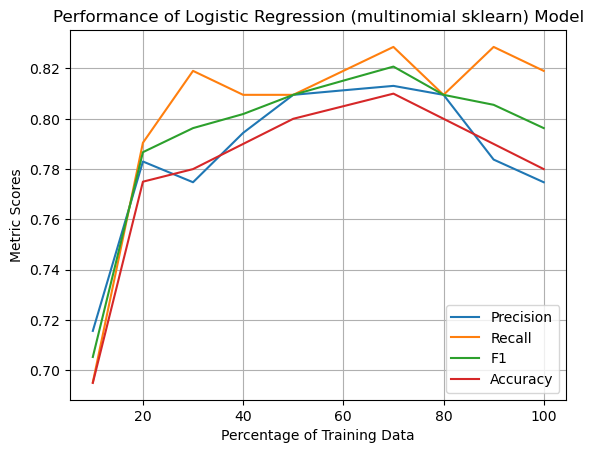

Metrics when trained on 10% of data
Precision: 0.46601941747572817
Recall: 0.45714285714285713
F1 score: 0.46153846153846156
Accuracy: 0.44


ValueError: Found input variables with inconsistent numbers of samples: [200, 320]

In [9]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)
model = LogisticRegression()
model.fit(cv_x_train, y_train)

cv_preds = model.predict(cv_x_dev)

y_dev_set = set(y_dev)
# cv_accuracy = accuracy(y_dev_set, set(cv_preds))
# cv_precision = precision(y_dev_set, set(cv_preds))
# cv_recall = recall(y_dev_set, set(cv_preds))
# cv_f1 = f_measure(y_dev_set, set(cv_preds))

# print(f'Accuracy with CountVectorizer vectors: {cv_accuracy}')
# print(f'Precision with CountVectorizer vectors: {cv_precision}')
# print(f'Recall with CountVectorizer vectors: {cv_recall}')
# print(f'F1 Score with CountVectorizer vectors: {cv_f1}')

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels
def nn_metrics_fun(train_feats, dev_feats, percentage):
    cutoff = int(len(train_feats[1]) * percentage)
    model = LogisticRegression()
    model.fit(train_feats[0][:cutoff], train_feats[1][:cutoff])

    preds = model.predict(dev_feats[0])

    return preds, dev_feats[1]

sutils.create_training_graph(nn_metrics_fun, 
                             (cv_x_train, y_train), 
                             (cv_x_dev, y_dev), 
                             "Logistic Regression (multinomial sklearn)", 
                             verbose=1)
sutils.create_training_graph(nn_metrics_fun, 
                             (cv_x_dev_binary, y_train), 
                             (cv_x_dev_binary, y_dev), 
                             "Logistic Regression (binomial sklearn)", 
                             verbose=1)
sutils.create_training_graph(nn_metrics_fun, 
                             (my_x_train, y_train), 
                             (my_x_dev, y_dev), 
                             "Logistic Regression (binomial my vectorizer)", 
                             verbose=1)
sutils.create_training_graph(nn_metrics_fun, 
                             (my_x_train_binary, y_train), 
                             (my_x_dev_binary, y_dev), 
                             "Logistic Regression (binomial my vectorizer)", 
                             verbose=1)
# takes approx 30 sec on Felix's computer

Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: __enter your final f1 score here__
- CountVectorizer features, multinomial: __enter your final f1 score here__
- your vectorized features, binarized: __enter your final f1 score here__
- CountVectorizer features, binarized: __enter your final f1 score here__

Produce your graph(s) for the combination with the best final f1 score.




6120 REQUIRED
----

Find the top 100 most important features to your Logistic Regression classifier when using 100% of the training data. To access the weights of your model, you can access the `model.coef_` attribute. You'll want to use a `StandardScalar` preprocessor. This will help us deal with the fact that we expect counts of certain words to be higher (e.g. stop words).

To find the importance of a feature, calculate the absolute value of each weight in the model, then order your features according to the absolute values of these weights. The feature with the heighest absolute value weight has the most importance.

Use __your__ (not CountVectorizer) multinomial vectors for this analysis.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# YOUR CODE HERE
# train a model on the scaled inputs
# This takes Felix's computer about 6.5 sec to run




In [ ]:
# print out the top 20 most informative features according to this model


In [ ]:
# re-evalaute your LR model with inputs that have been filtered to only use the top 500 most informative features


In [ ]:
# create the same graph as before, but with the filtered inputs
